In [1]:
from crocolaketools.utils import params
from crocolaketools.loader.loader import Loader

lat0 = 5
lat1 = 50
lon0 = -90
lon1 = -30

**Remember**: add path to CrocoLake to `db_rootpath`

In [2]:
%%time
selected_variables = [
    "LATITUDE",
    "LONGITUDE",
    "PRES",
    "PSAL",
    "TEMP"
]

db_type="PHY"
loader = Loader(
    selected_variables=selected_variables,
    db_type="PHY",
    db_list=["SprayGliders","GLODAP","ARGO"],
    db_rootpath=""
)

filters = [
    ("LATITUDE",'>',lat0),
    ("LATITUDE",'<',lat1),
    ("LONGITUDE",'>',lon0),
    ("LONGITUDE",'<',lon1),
    ("TEMP",">=",-1e30),
    ("TEMP","<=",+1e30)
]
loader.set_filters(filters)

ddf = loader.get_dataframe()

Reading data from ['SprayGliders', 'GLODAP', 'ARGO'] .
Reading PHY parameters.
Looking for data in /vortexfs1/share/boom/users/enrico.milanese/myDatabases/0000_PHY_TRITON-DEV/current/
Reading databases from the following paths:
{'SprayGliders': '/vortexfs1/share/boom/users/enrico.milanese/myDatabases/0000_PHY_TRITON-DEV/current/1200_PHY_SPRAY-DEV_2024-11-14', 'GLODAP': '/vortexfs1/share/boom/users/enrico.milanese/myDatabases/0000_PHY_TRITON-DEV/current/1100_PHY_GLODAP-DEV_2024-11-14', 'ARGO': '/vortexfs1/share/boom/users/enrico.milanese/myDatabases/0000_PHY_TRITON-DEV/current/1011_PHY_ARGO-CLOUD_2025-02-08'}
Reading columns ['LATITUDE', 'LONGITUDE', 'PRES', 'PSAL', 'TEMP'] from db SprayGliders.
Reading columns ['LATITUDE', 'LONGITUDE', 'PRES', 'PSAL', 'TEMP'] from db GLODAP.
Reading columns ['LATITUDE', 'LONGITUDE', 'PRES', 'PSAL', 'TEMP'] from db ARGO.
CPU times: user 142 ms, sys: 107 ms, total: 248 ms
Wall time: 136 ms


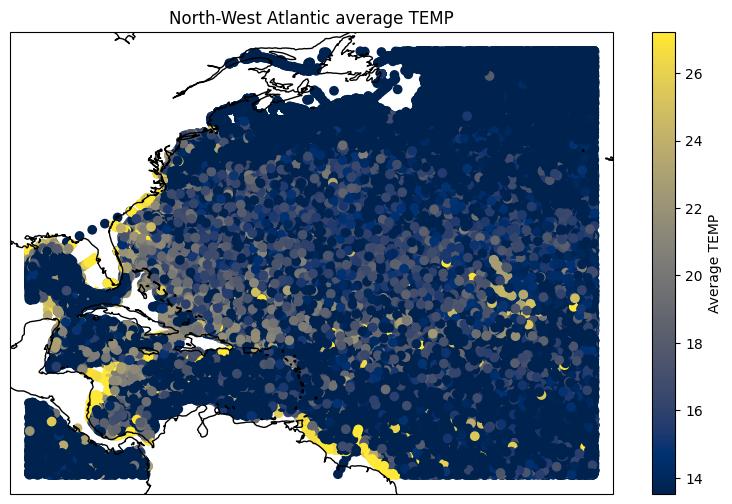

CPU times: user 3min 55s, sys: 1min 17s, total: 5min 12s
Wall time: 1min 15s


In [3]:
%%time
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import colormaps

import numpy as np

ref_var = "TEMP"

# Group by 'LATITUDE' and 'LONGITUDE', and aggregate by averaging over 'PRES_ADJUSTED'
combined_grouped = ddf.groupby(['LATITUDE', 'LONGITUDE']).agg({
    ref_var: 'mean',  # Take the mean depth
}).reset_index().compute()

# Plotting using Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Scatter plot
cbar_min = ddf[ref_var].quantile(q=0.1).compute()
cbar_max = ddf[ref_var].quantile(q=0.9).compute()
plt.scatter(
    combined_grouped['LONGITUDE'], combined_grouped['LATITUDE'], 
    c=combined_grouped[ref_var], 
    vmin=cbar_min, vmax=cbar_max, cmap='cividis', 
    transform=ccrs.PlateCarree()
)
plt.colorbar(label='Average ' + ref_var)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('North-West Atlantic average ' + ref_var)
plt.grid(True)
plt.xlim([lon0-2, lon1+2])
plt.ylim([lat0-2, lat1+2])
plt.show()

In [4]:
len(combined_grouped)

220267

In [5]:
len(ddf)

82693843